In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 870 kB/s eta 0:00:01
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Lab 1 Data Preprocessing, Cleaning and joining from multiple sources

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
used_cars_data = pd.read_csv("used_cars.csv")

In [5]:
np.random.seed(0) 

In [6]:
used_cars_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [7]:
missing_values_count = used_cars_data.isnull().sum()
missing_values_count

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [8]:
total_cells = np.prod(used_cars_data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.8271389373908704


In [9]:
used_cars_data.dropna()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,"53,705 mi.",Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,"$25,900"
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [10]:
columns_with_na_dropped = used_cars_data.dropna(axis=1)
columns_with_na_dropped.head()

,brand,model,model_year,milage,engine,transmission,ext_col,int_col,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",3.5 Liter DOHC,Automatic,Blue,Black,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,"$34,999"


In [11]:
print("Columns in original dataset: %d \n" % used_cars_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 12 

Columns with na's dropped: 9


In [12]:
subset_used_cars_data = used_cars_data.loc[:,'brand':'fuel_type']
subset_used_cars_data

,brand,model,model_year,milage,fuel_type
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline
...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline
4006,Porsche,Taycan,2022,"2,116 mi.",NaN
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline


In [13]:
subset_used_cars_data.fillna(0)

,brand,model,model_year,milage,fuel_type
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline
...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline
4006,Porsche,Taycan,2022,"2,116 mi.",0
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline


In [14]:
subset_used_cars_data.fillna(method='bfill', axis = 0).fillna(0)

/var/folders/k8/35vdm9jn2t53z_ftr75fvb8w0000gn/T/ipykernel_71766/1726619396.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_used_cars_data.fillna(method='bfill', axis = 0).fillna(0)


,brand,model,model_year,milage,fuel_type
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline
...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline
4006,Porsche,Taycan,2022,"2,116 mi.",Gasoline
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline


## Scaling and Normalization

In [15]:

pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 1.2 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     |████████████████████████████████| 2.8 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.0 MB/s eta 0:00:01
  Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
     |████████████████████████████████| 249 kB 1.2 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 2.7 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.4 MB 45 kB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# modules we'll use
import pandas as pd
import numpy as np


# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

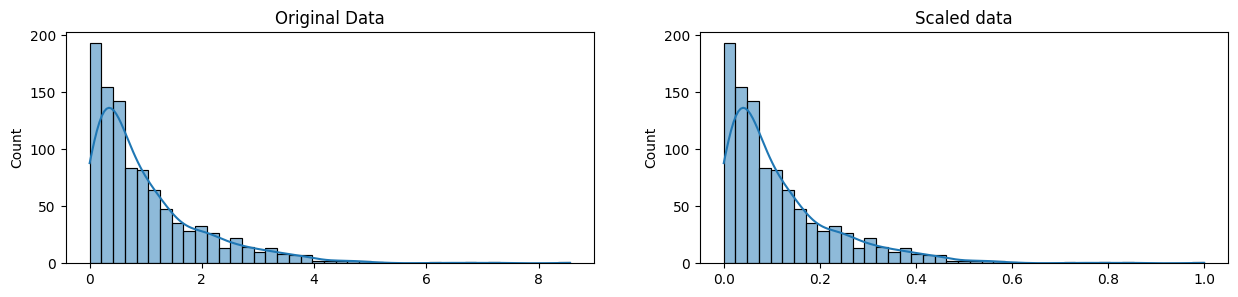

In [22]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

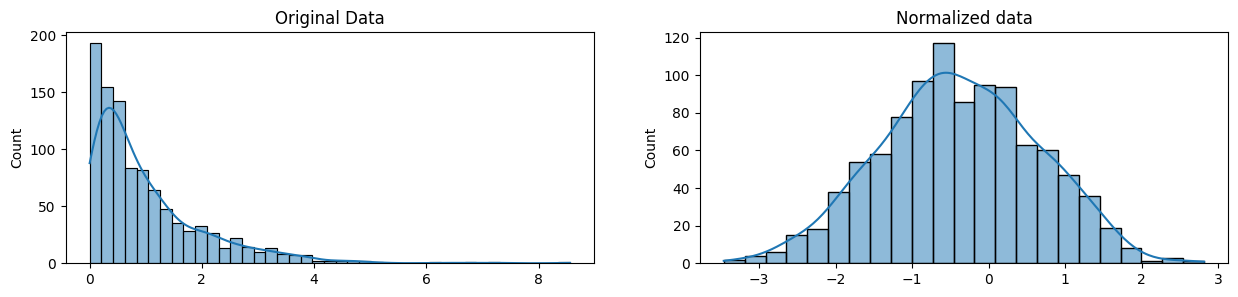

In [23]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Original Data Head:
          x
0  0.795875
1  1.255931
2  0.923223
3  0.787201
4  0.551048

Normalized Data Head (df_z is a Series):
0   -0.201694
1    0.245132
2   -0.078007
3   -0.210118
4   -0.439479
Name: x, dtype: float64


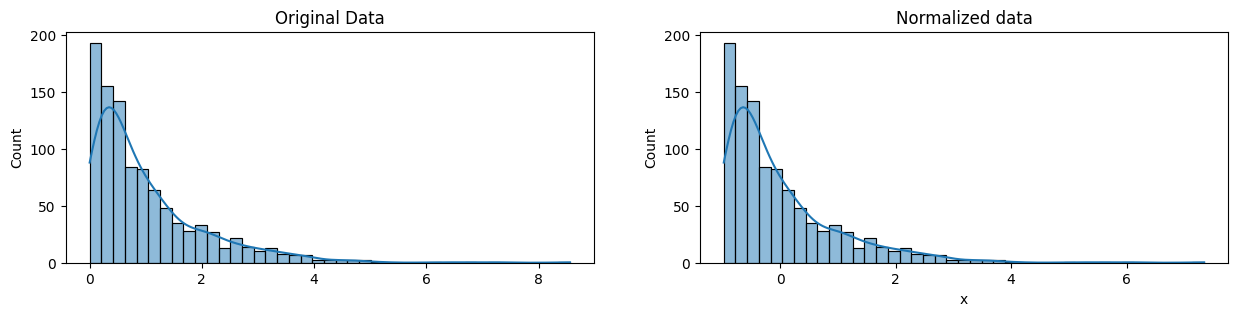

In [27]:

# convert to DataFrame for easy normalization
df = pd.DataFrame(original_data, columns=['x'])

# z-normalize the single 'x' column
df_z = (df['x'] - df['x'].mean()) / df['x'].std()

print("Original Data Head:")
print(df.head())
print("\nNormalized Data Head (df_z is a Series):")
print(df_z.head())

# Plotting the results
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
# ⚠️ Note: We now plot df_z directly as it is a Series
sns.histplot(df_z, ax=ax[1], kde=True, legend=False) 
ax[1].set_title("Normalized data")
plt.show()




In [28]:
landslides = pd.read_csv("catalog.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'catalog.csv'